# One layer nets - excersises

Developing three functions:
- init_one_layer - to build the net, and randomly initialize nets
- sim_one_layer - to simulate the net's operation
- train_one_layer - to train the net

**Note** When using one layer nets there is no bias

And one testing script:
- test_one_layer - 5-3 net, problem: recognizing animals

## init_one_layer

Creates a SxK (inputs_num x neurons_num) matrix of weights

![init_one_layer](images/init_one_layer.png)
![init_one_layer2](images/init_one_layer_2.png)

In [9]:
%matplotlib widget
# Init
import numpy as np

# The function generates random weights for 
# inputs_num inputs, 
def init_one_layer(inputs_num: int, neurons_num: int) -> np.ndarray:
    return np.random.rand(inputs_num, neurons_num) * 0.2 - 0.1

print(init_one_layer(4, 3))

[[-0.09067791 -0.03181549  0.04651628]
 [-0.01419057 -0.08467858 -0.04806922]
 [-0.01327307  0.01708164 -0.07840768]
 [-0.07622978 -0.02726185 -0.03573679]]


## sim_one_layer

- calculates output vector Y of a layer with weight matrix W for input vector X
- All neurons use signoid activation function

![sim_one_layer](images/sim_one_layer.png)

A sigmoid activation function is kind of like:

$$ 
y = f(u) = \begin{cases}
1 \text{ if }& u \ge 0 \\
0 \text{ if }& u < 0
\end{cases}
$$

And can be approximated to:
$$ 
y = f(u) = \frac{1}{1 + \exp^{-\beta u}}
$$
$$
f'(u) = \beta \cdot y \cdot(1 - y)
$$


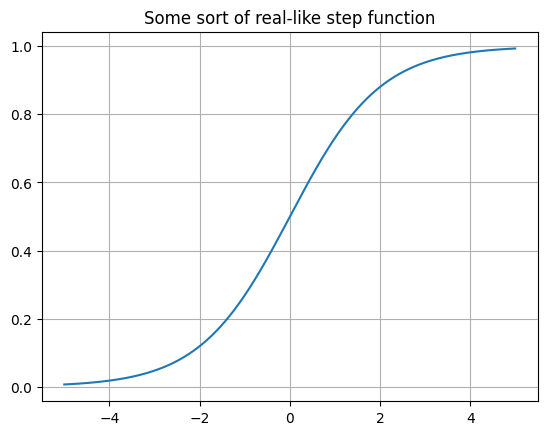

array([0.16429076, 0.30628902, 0.2506852 ])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

INPUTS_NUM = 4
NEURONS_NUM = 3

"""
Initially here we create a function that is supposed to 
"""


def sim_one_layer_example(weights: np.ndarray, input_vector: np.ndarray) -> np.ndarray:
    beta = 1
    U = np.arange(-5., 5., 0.01)
    Y = 1 / (1 + np.exp(-beta * U))
    plt.figure(1)
    plt.plot(U, Y)
    plt.grid()
    plt.title('Some sort of real-like step function')
    plt.show()


def sim_one_layer(weights: np.ndarray, input_vector: np.ndarray) -> np.ndarray:

    beta = 2.
    U = np.matmul(weights.T, input_vector)
    # print(U)
    Y = 1 / (1 + np.exp(-beta * U))
    # plt.figure(2)
    # plt.scatter(U, Y)
    # plt.grid()
    # plt.title('Actual output')
    # plt.show()
    return Y


W = init_one_layer(INPUTS_NUM, NEURONS_NUM)

X = np.array([1., 20., 20., 1.])

sim_one_layer_example(W, X)
sim_one_layer(W, X)


## test_one_layer script

Problem - animal recognition - test_one_layer

Net's inputs:
1. Number of legs
2. Does it live in water
3. Can it fly
4. Does it have feathers
5. Is it oviparous - born from legs

Which can be represented by a matrix:


$$
P =
\begin{bmatrix}
4 & 2 & -1 \\ 
0.01 & -1 & 3.5 \\
0.01 & 2 & 0.01 \\
-1 & 2.5 & -2 \\
-1.5 & 2 & 1.5 \\
\end{bmatrix}
$$

And then we have the matrix of desired outputs:
1. Mammal
2. Bird
3. Fish

Represented by a matrix:

$$
T = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

In [14]:
%matplotlib inline


def train_one_layer(weight_before_train: np.ndarray,
                    inputs: np.ndarray,
                    desired_outputs: np.ndarray,
                    steps_num: int) -> np.ndarray:
    noExamples = inputs.shape[1]
    # print(noExamples)
    W = weight_before_train
    beta = 5.
    lr = 0.1
    for i in range(steps_num):
        exampleNo = np.random.randint(noExamples)
        # print(int(exampleNo))
        X = inputs[:, exampleNo]
        Y = sim_one_layer(W, X)
        # print(desired_outputs, Y)
        D = desired_outputs[:, exampleNo] - Y
        E = D * beta * Y * (1-Y)
        # print(X, np.atleast_2d(E).T)
        dW = np.multiply(X, np.atleast_2d(E).T) * lr
        # print(dW)
        W = W + dW.T
    return W


W_new = init_one_layer(5, 3)

P = np.array([[4., 2., -1.], [0.01, -1, 3.5],
             [0.01, 2, 0.02], [-1, 2.5, -2], [-1.5, 2, 1.5]])
print(P)
Y_before = sim_one_layer(W_new, P)
desired_Y = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
print(W_after := train_one_layer(W_new, P, desired_Y, 100))
Y_after = sim_one_layer(W_after, P)
print(f"Y_before training:\n {Y_before}")
print(f"Y_after training:\n {Y_after}")


[[ 4.    2.   -1.  ]
 [ 0.01 -1.    3.5 ]
 [ 0.01  2.    0.02]
 [-1.    2.5  -2.  ]
 [-1.5   2.    1.5 ]]
[[ 0.19012913 -0.24374103 -0.48376897]
 [-0.27595585 -0.39737627  0.29399046]
 [-0.31862695  0.20274328 -0.08710339]
 [-0.19254591  0.44782933 -0.22449652]
 [-0.58138595  0.1931065   0.07990512]]
Y_before training:
 [[0.59224482 0.60358479 0.53234092]
 [0.6313208  0.7300667  0.27385587]
 [0.52429068 0.44146531 0.51116572]]
Y_after training:
 [[0.97437908 0.03731421 0.0356169 ]
 [0.03140744 0.97447733 0.02936805]
 [0.02516691 0.0247388  0.98462758]]


## Step by step

So what does this function do?

In steps:
1. Draw example number
2. Present the chosen example - calculate output
3. Calculate errors
4. Adjust weight - dW
5. Add adjustments to weights

Repeat that process n times